In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-recommendation-system-dataset/mobile_recommendation_system_dataset.csv


In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/mobile-recommendation-system-dataset/mobile_recommendation_system_dataset.csv')

# Display the first few rows of the DataFrame
df.head()


,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


In [3]:
# Check the shape of the DataFrame
shape = df.shape

# Check for missing values
missing_values = df.isnull().sum()

shape, missing_values


((2546, 5),
 name        0
 ratings     0
 price       0
 imgURL      0
 corpus     12
 dtype: int64)

In [4]:
# Remove the rows with missing values
df_clean = df.dropna()

# Check the shape of the cleaned DataFrame
clean_shape = df_clean.shape

# Check for missing values in the cleaned DataFrame
clean_missing_values = df_clean.isnull().sum()

clean_shape, clean_missing_values


((2534, 5),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 dtype: int64)

In [5]:
import re

def extract_storage(corpus):
    """Extract the storage capacity from the corpus."""
    match = re.search(r'Storage(\d+)', corpus)
    if match:
        return int(match.group(1))
    return None

# Apply the function to the 'corpus' column
df_clean['Storage'] = df_clean['corpus'].apply(extract_storage)

# Display the first few rows of the DataFrame
df_clean.head()


/tmp/ipykernel_21/3585624089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Storage'] = df_clean['corpus'].apply(extract_storage)


,name,ratings,price,imgURL,corpus,Storage
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0


In [6]:
def extract_ram(corpus):
    """Extract the RAM from the corpus."""
    match = re.search(r'RAM(\d+)', corpus)
    if match:
        return int(match.group(1))
    return None

def extract_system(corpus):
    """Extract the operating system from the corpus."""
    match = re.search(r'System(.*?)Processor', corpus)
    if match:
        return match.group(1).strip()
    return None

def extract_processor(corpus):
    """Extract the processor type from the corpus."""
    match = re.search(r'Processor (.*?) ', corpus)
    if match:
        return match.group(1).strip()
    return None

# Apply the functions to the 'corpus' column
df_clean['RAM'] = df_clean['corpus'].apply(extract_ram)
df_clean['System'] = df_clean['corpus'].apply(extract_system)
df_clean['Processor'] = df_clean['corpus'].apply(extract_processor)

# Display the first few rows of the DataFrame
df_clean.head()


/tmp/ipykernel_21/1100730100.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['RAM'] = df_clean['corpus'].apply(extract_ram)
/tmp/ipykernel_21/1100730100.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['System'] = df_clean['corpus'].apply(extract_system)
/tmp/ipykernel_21/1100730100.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12,TypeMediatek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0,TypeMediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11,Speed2.4
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11,TypeQualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS 15,TypeA15


In [7]:
# Check the unique values for 'System' and 'Processor'
unique_systems = df_clean['System'].unique()
unique_processors = df_clean['Processor'].unique()

unique_systems, unique_processors


(array(['Android 12', 'Android Pie 9.0', 'Android 11', 'Android Q 11',
        'iOS 15', 'iOS 9', 'Android 13', 'Android Pie 9',
        'Android Nougat 7', 'Android 10', 'iOS 16', None,
        'Android Q Android Q 12.5', 'Android Oreo 8.1',
        'Android Marshmallow 6.0.1', 'Android Oreo 8.1.0',
        'Android 13 (Go Edition)', 'Android Android 12', 'Android Q 10',
        'iOS 14.2', 'Android Pie Android v9.0 (Pie)', 'Android Andriod 11',
        'Android Android 10',
        'Android HiOS 8.6 based on Android 12-Go Edition',
        'Android Nougat 7.1', 'iOS 14', 'Android Android 13', 'iOS 12',
        'Android 12 Go', 'iOS 7', 'Android Nougat 7.1.2',
        'Android Oreo V11', 'Android ANdroid 13 OxygenOS',
        'Android Android 13.0', 'Android Android v12.0',
        'Android Android 11', 'Android Pie 10', 'Android Oreo 8.0', 'Q 10',
        'Android Q ANDROID 10', 'Android Q 12', 'iOS 13',
        'Android Android 11 Go', 'Android 10 (Go Edition)',
        'Android Oxy

In [8]:
def clean_system(system):
    """Clean the system values."""
    if pd.isnull(system):
        return None
    if 'android' in system.lower():
        return 'Android'
    if 'ios' in system.lower():
        return 'iOS'
    if 'tizen' in system.lower():
        return 'Tizen'
    return system

# Apply the function to the 'System' column
df_clean['System'] = df_clean['System'].apply(clean_system)

# Check the unique values for 'System'
unique_systems_clean = df_clean['System'].unique()

unique_systems_clean


/tmp/ipykernel_21/2638557162.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['System'] = df_clean['System'].apply(clean_system)


array(['Android', 'iOS', None, 'Q 10', 'Series 30 Feature phone', '1',
       'Series 30', 'Tizen'], dtype=object)

In [9]:
def clean_processor(processor):
    """Clean the processor values."""
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    return 'Other'

# Apply the function to the 'Processor' column
df_clean['Processor'] = df_clean['Processor'].apply(clean_processor)

# Check the unique values for 'Processor'
unique_processors_clean = df_clean['Processor'].unique()

unique_processors_clean

/tmp/ipykernel_21/1699683873.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Processor'] = df_clean['Processor'].apply(clean_processor)


array(['MediaTek', 'Other', 'Qualcomm', None, 'Apple'], dtype=object)

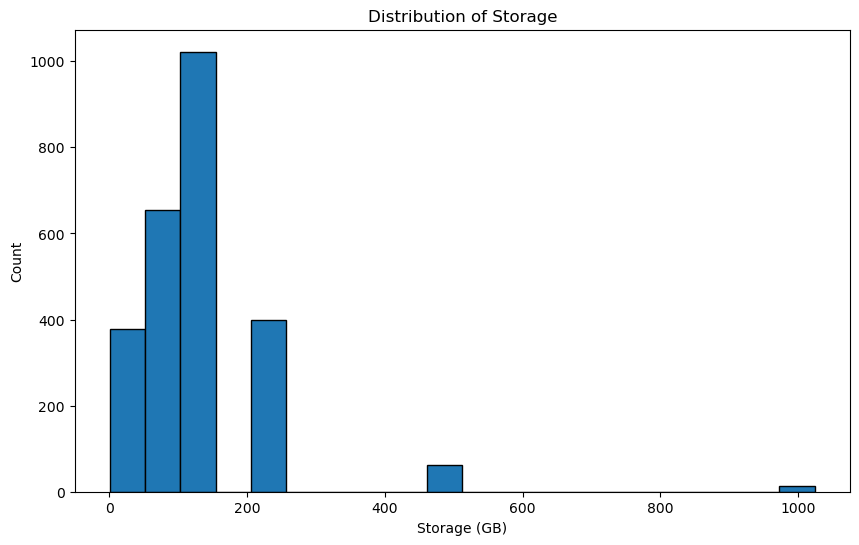

In [10]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Storage' feature
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Storage'], bins=20, edgecolor='black')
plt.title('Distribution of Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Count')
plt.show()


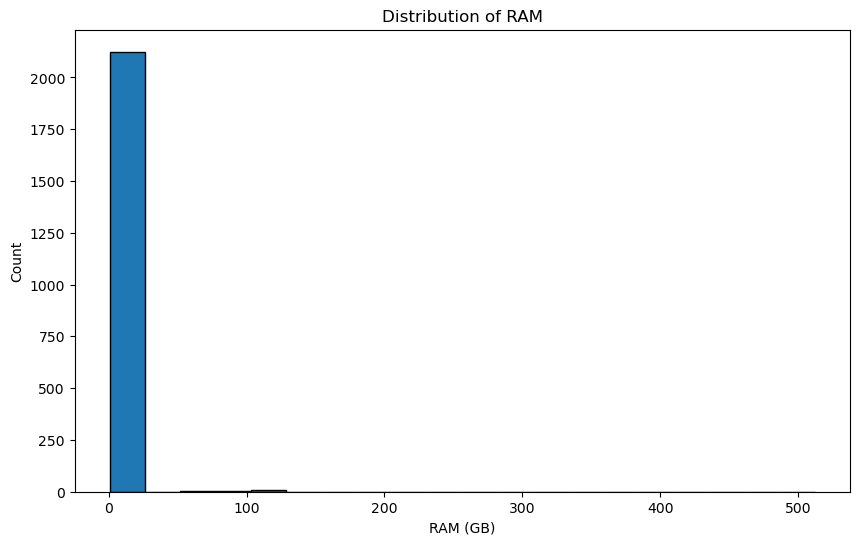

In [11]:
# Plot a histogram of the 'RAM' feature
plt.figure(figsize=(10, 6))
plt.hist(df_clean['RAM'].dropna(), bins=20, edgecolor='black')  # Drop NaN values for the plot
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()


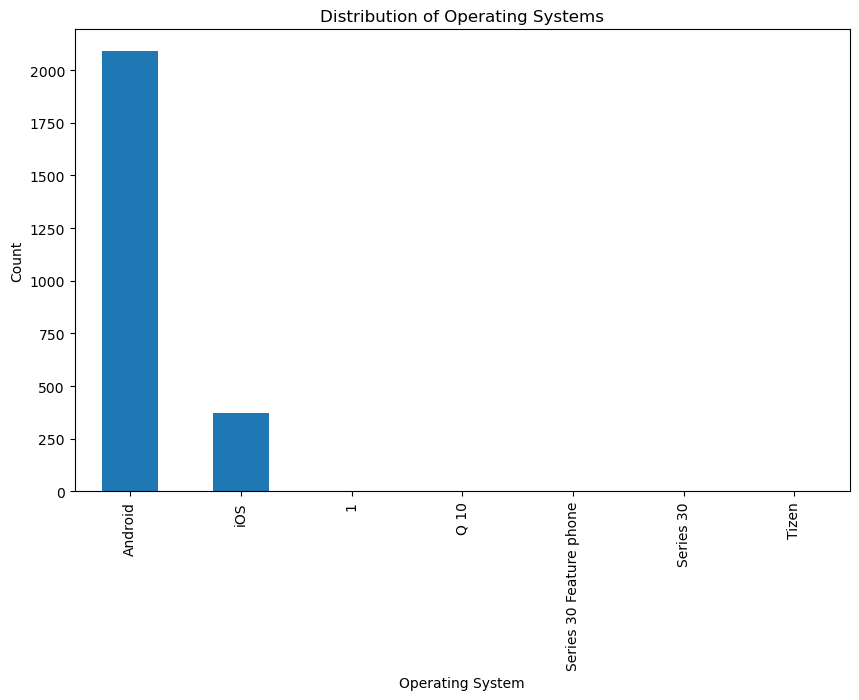

In [12]:
# Plot a bar chart of the 'System' feature
plt.figure(figsize=(10, 6))
df_clean['System'].value_counts().plot(kind='bar')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()


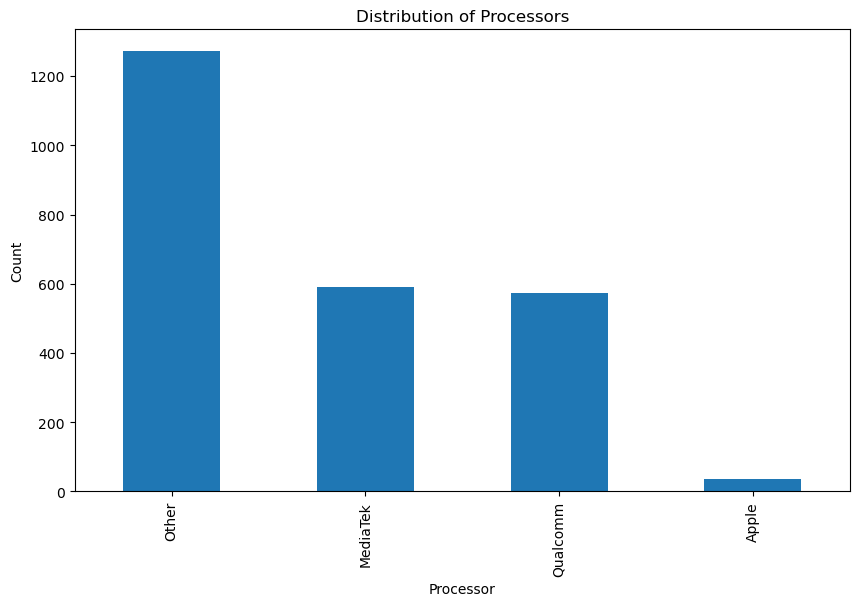

In [13]:
# Plot a bar chart of the 'Processor' feature
plt.figure(figsize=(10, 6))
df_clean['Processor'].value_counts().plot(kind='bar')
plt.title('Distribution of Processors')
plt.xlabel('Processor')
plt.ylabel('Count')
plt.show()


In [14]:
def clean_price(price):
    """Clean the price values."""
    # Remove any non-numeric characters
    cleaned_price = re.sub(r'\D', '', price)
    
    # Convert the remaining value to an integer
    try:
        return int(cleaned_price)
    except ValueError:
        return None

# Apply the function to the 'price' column
df_clean['price'] = df_clean['price'].apply(clean_price)

# Check the first few rows of the DataFrame
df_clean.head()


/tmp/ipykernel_21/1804552378.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].apply(clean_price)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other


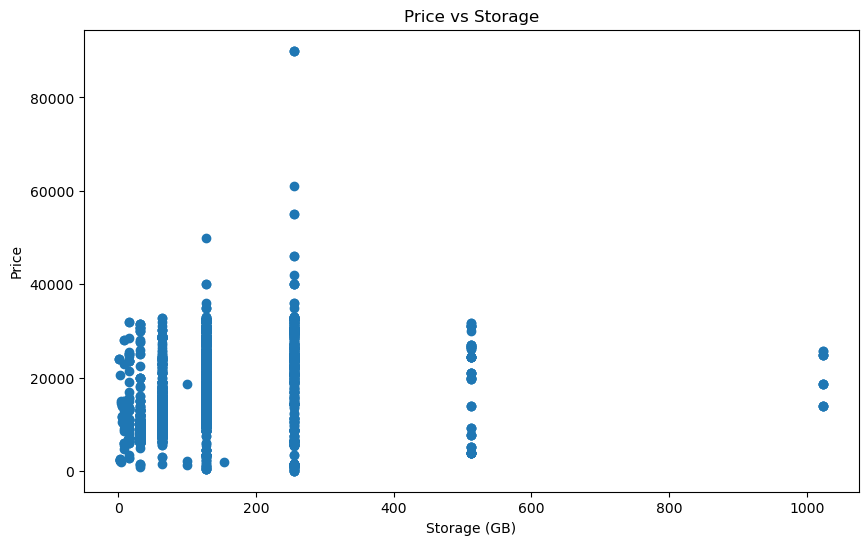

0.2708852261801912

In [15]:
    # Plot a scatter plot of 'price' vs 'Storage'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Storage'], df_clean['price'])
plt.title('Price vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient between 'price' and 'Storage'
correlation = df_clean['price'].corr(df_clean['Storage'])

correlation


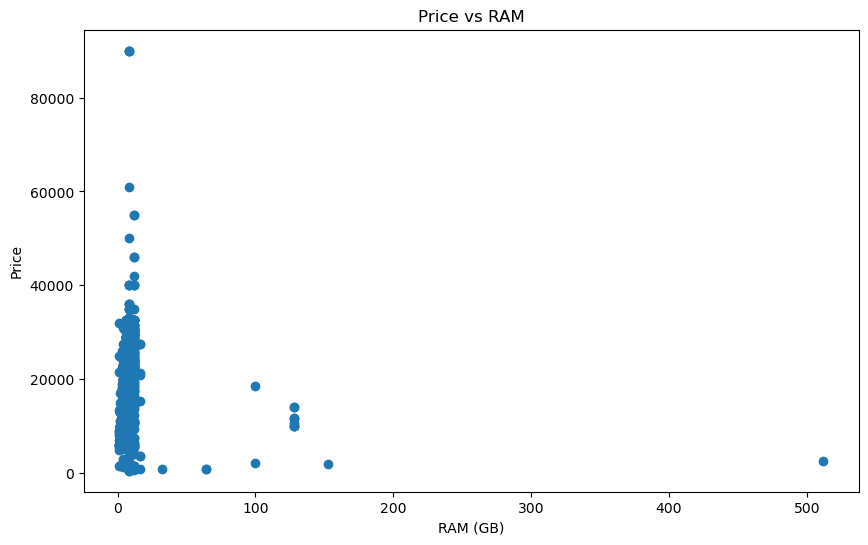

0.029167178591028332

In [16]:
# Plot a scatter plot of 'price' vs 'RAM'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['RAM'], df_clean['price'])
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient between 'price' and 'RAM'
correlation = df_clean['price'].corr(df_clean['RAM'])

correlation


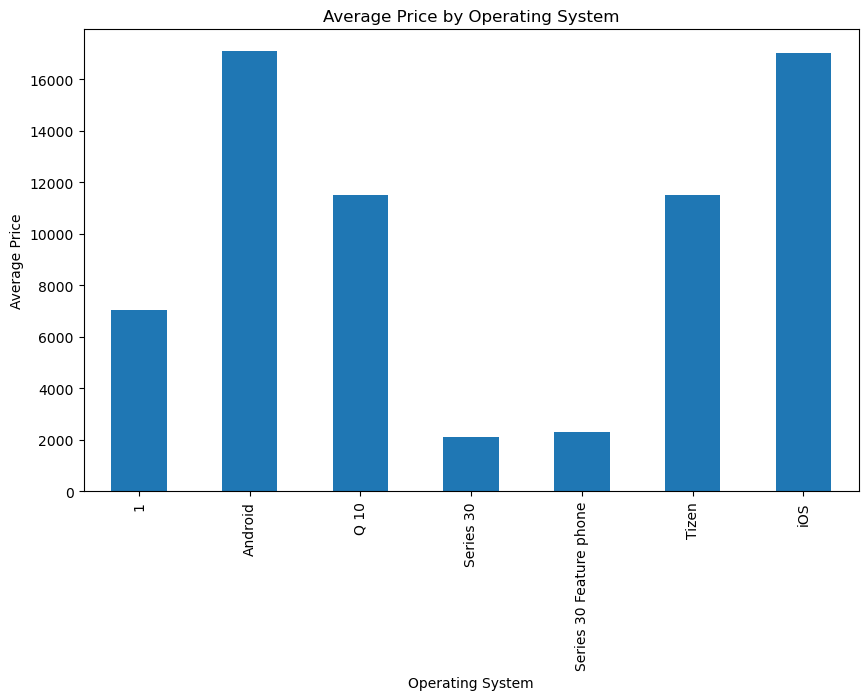

In [17]:
# Calculate the average price for each system
avg_price_system = df_clean.groupby('System')['price'].mean()

# Plot a bar chart of the average price for each system
plt.figure(figsize=(10, 6))
avg_price_system.plot(kind='bar')
plt.title('Average Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.show()


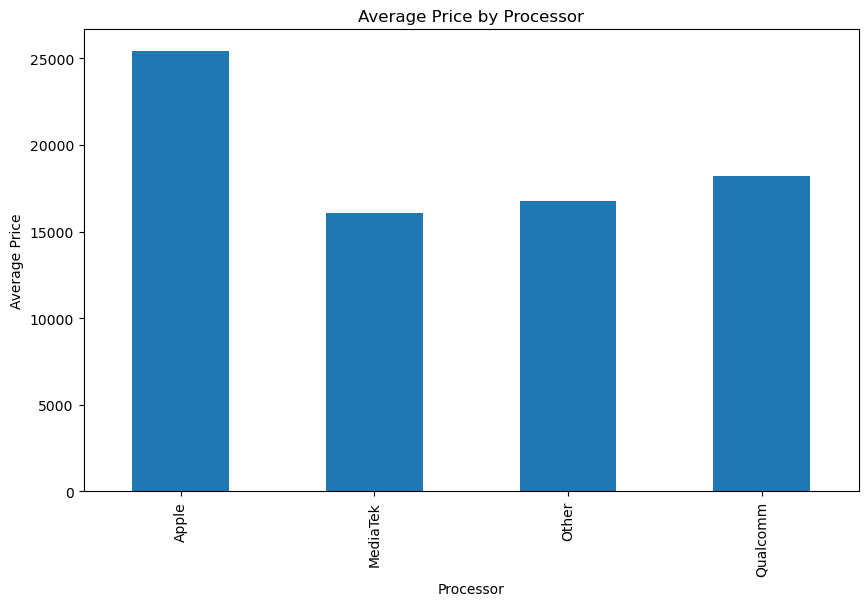

In [18]:
# Calculate the average price for each processor
avg_price_processor = df_clean.groupby('Processor')['price'].mean()

# Plot a bar chart of the average price for each processor
plt.figure(figsize=(10, 6))
avg_price_processor.plot(kind='bar')
plt.title('Average Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Price')
plt.show()


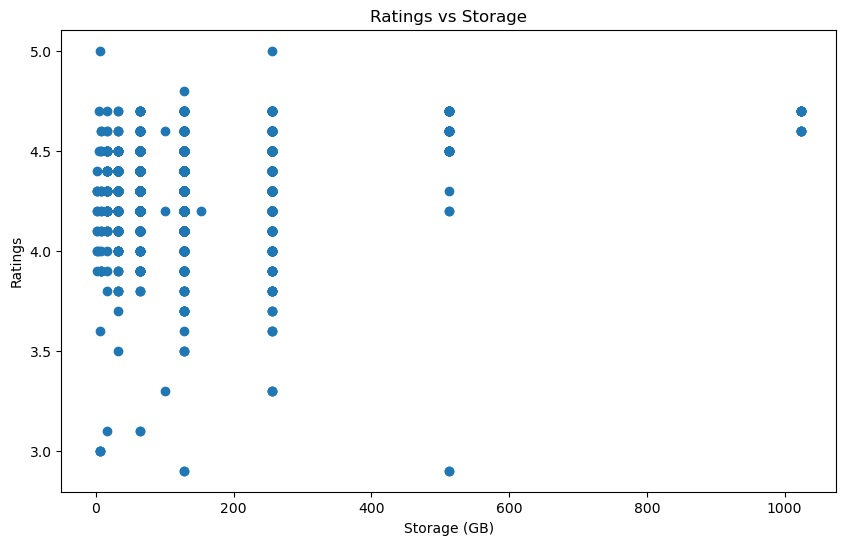

0.2069042283448845

In [19]:
# Plot a scatter plot of 'ratings' vs 'Storage'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Storage'], df_clean['ratings'])
plt.title('Ratings vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'Storage'
correlation = df_clean['ratings'].corr(df_clean['Storage'])

correlation


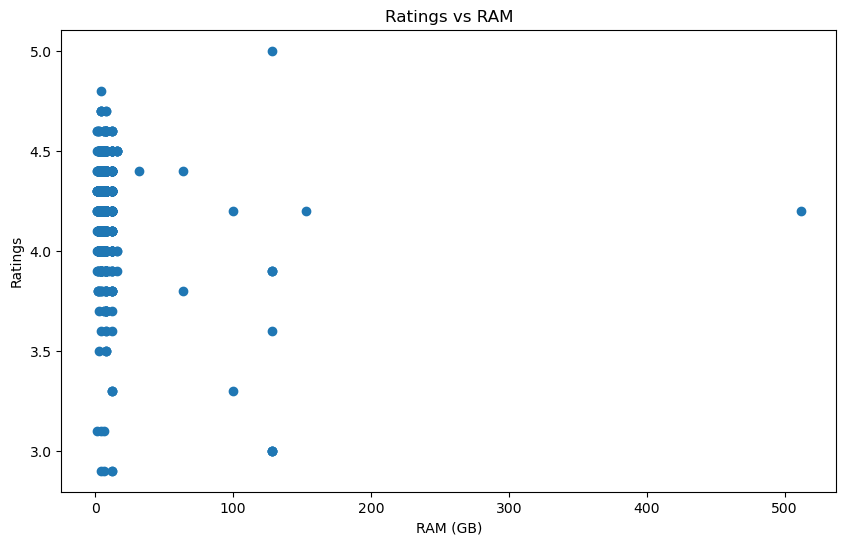

-0.1569162647197962

In [20]:
# Plot a scatter plot of 'ratings' vs 'RAM'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['RAM'], df_clean['ratings'])
plt.title('Ratings vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'RAM'
correlation = df_clean['ratings'].corr(df_clean['RAM'])

correlation


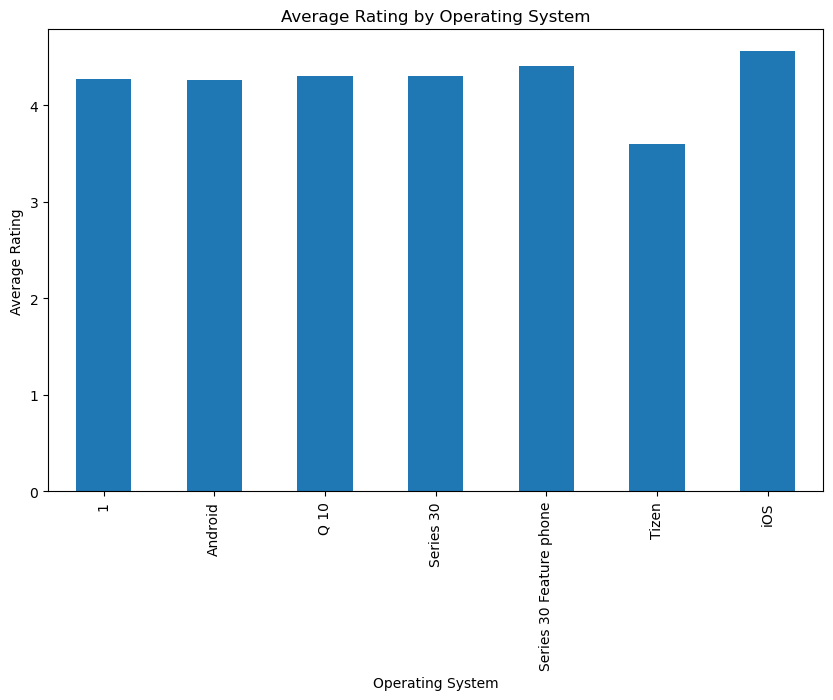

In [21]:
# Calculate the average rating for each system
avg_rating_system = df_clean.groupby('System')['ratings'].mean()

# Plot a bar chart of the average rating for each system
plt.figure(figsize=(10, 6))
avg_rating_system.plot(kind='bar')
plt.title('Average Rating by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Rating')
plt.show()


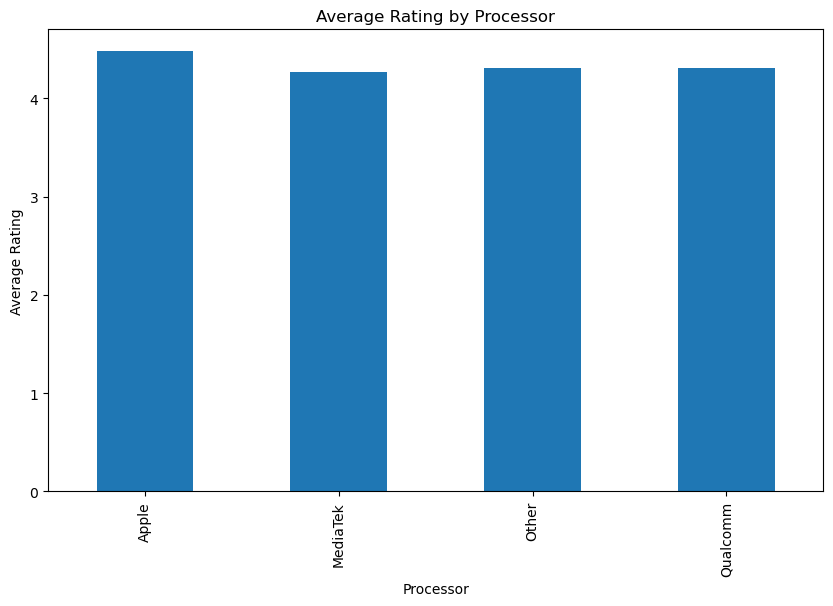

In [22]:
# Calculate the average rating for each processor
avg_rating_processor = df_clean.groupby('Processor')['ratings'].mean()

# Plot a bar chart of the average rating for each processor
plt.figure(figsize=(10, 6))
avg_rating_processor.plot(kind='bar')
plt.title('Average Rating by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Rating')
plt.show()


In [23]:
def extract_brand(name):
    """Extract the brand from the name."""
    return name.split()[0]

# Apply the function to the 'name' column
df_clean['Brand'] = df_clean['name'].apply(extract_brand)

# Check the first few rows of the DataFrame
df_clean.head()


/tmp/ipykernel_21/2167921764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Brand'] = df_clean['name'].apply(extract_brand)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android,MediaTek,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android,MediaTek,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android,Other,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android,Qualcomm,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other,APPLE


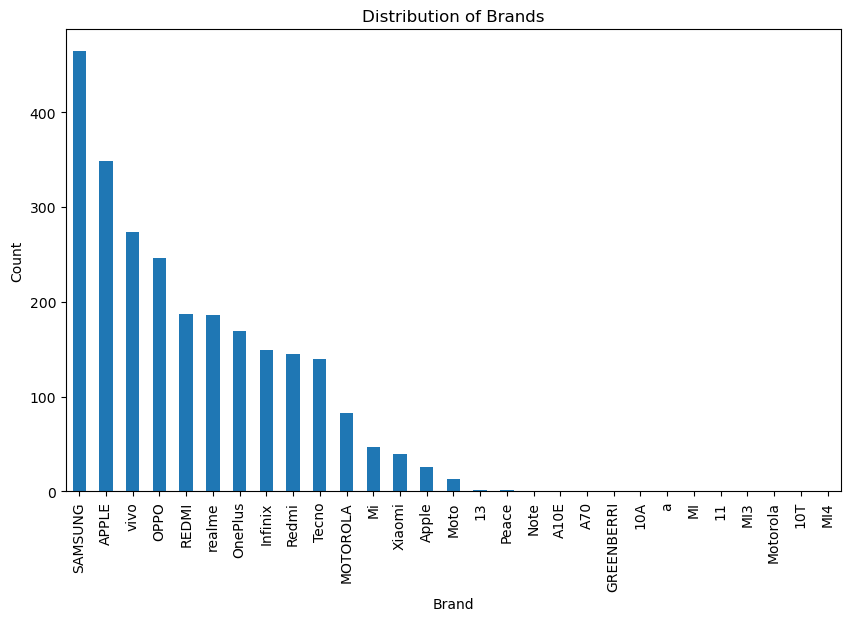

In [24]:
# Plot a bar chart of the brands
plt.figure(figsize=(10, 6))
df_clean['Brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


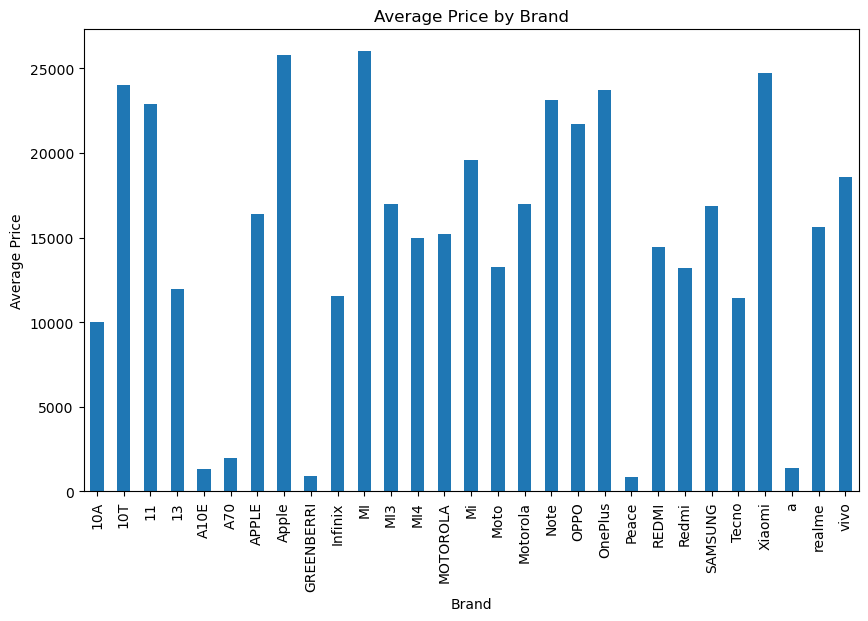

In [25]:
# Calculate the average price for each brand
avg_price_brand = df_clean.groupby('Brand')['price'].mean()

# Plot a bar chart of the average price for each brand
plt.figure(figsize=(10, 6))
avg_price_brand.plot(kind='bar')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()


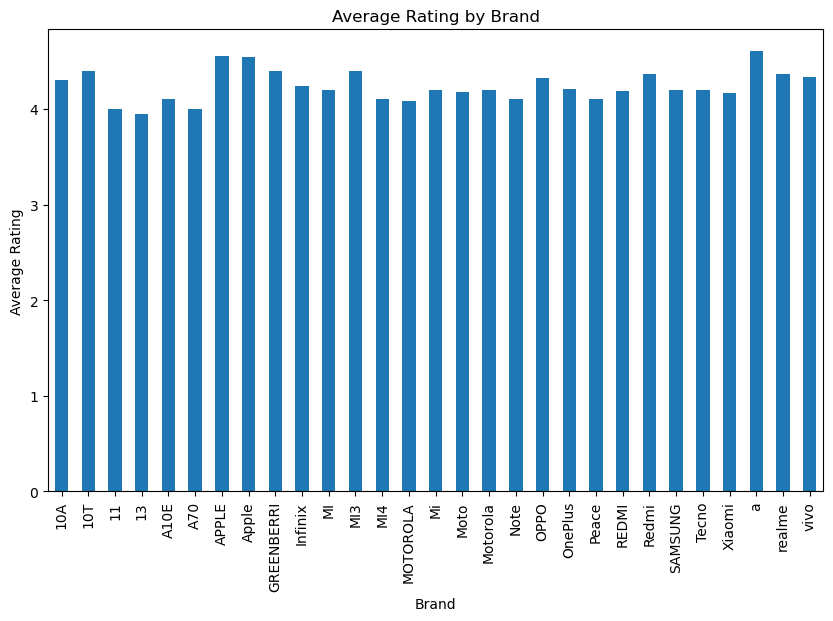

In [26]:
# Calculate the average rating for each brand
avg_rating_brand = df_clean.groupby('Brand')['ratings'].mean()

# Plot a bar chart of the average rating for each brand
plt.figure(figsize=(10, 6))
avg_rating_brand.plot(kind='bar')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()


In [27]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    """Recommend devices based on user preferences."""
    # Filter the DataFrame based on the user's preferences
    df_filtered = df_clean[
        (df_clean['Brand'] == preferred_brand) &
        (df_clean['System'] == preferred_system) &
        (df_clean['price'] >= min_price) &
        (df_clean['price'] <= max_price)
    ]
    
    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)
    
    return recommendations

# Test the function with some example preferences
recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=50000, max_price=80000)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand


In [28]:
# Test the function with different preferences
recommend_devices(preferred_brand='Samsung', preferred_system='Android', min_price=10000, max_price=20000)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand


In [29]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    """Recommend devices based on user preferences."""
    # Filter the DataFrame based on all user's preferences
    df_filtered = df_clean[
        (df_clean['Brand'] == preferred_brand) &
        (df_clean['System'] == preferred_system) &
        (df_clean['price'] >= min_price) &
        (df_clean['price'] <= max_price)
    ]
    
    # If no devices match all preferences, filter based on brand and price range
    if df_filtered.empty:
        df_filtered = df_clean[
            (df_clean['Brand'] == preferred_brand) &
            (df_clean['price'] >= min_price) &
            (df_clean['price'] <= max_price)
        ]
    
    # If still no devices match, filter based on price range only
    if df_filtered.empty:
        df_filtered = df_clean[
            (df_clean['price'] >= min_price) &
            (df_clean['price'] <= max_price)
        ]
    
    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)
    
    return recommendations

# Test the function with some example preferences
recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=50000, max_price=80000)


,name,ratings,price,imgURL,corpus,Storage,RAM,System,Processor,Brand
297,"OPPO Reno10 Pro+ 5G (Silvery Grey, 256 GB)",4.6,54999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 13Processor ...,256.0,12.0,Android,Other,OPPO
1633,"OPPO Reno10 Pro+ 5G (Glossy Purple, 256 GB)",4.6,54999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 13Processor ...,256.0,12.0,Android,Other,OPPO
1128,"OPPO Find X (Glacier Blue, 256 GB)",4.4,60990,https://rukminim2.flixcart.com/image/312/312/j...,Storage256 GBRAM8 SystemAndroid Oreo 8.1.0Pro...,256.0,8.0,Android,Other,OPPO
